# PROJET GROUPE DE PYTHON



# THEME : APPLICATION DU MACHINE LEARNING EN FINANCE : CAS DU   CAC40




   Présenté par : 
 Abdaldoidoud Zouliami.
 Christine Laetitia Tjega.
 Souleymane Kane Diallo
                                                   

Ce projet s’inscrit dans le cadre du cours de premier semestre de Machine Learning pour le Data scientist à l’ENSAE. Ce dernier se fait par groupe de 2 à 3 élèves. Il consiste à appliquer les différents outils de Machine Learning vus essentiellement en cours qui sont également complétés par des recherches personnelles si nécessaire face à la problématique d’étude choisie. En effet, chaque groupe d’élèves est libre de choisir sa propre thématique d’étude. Le sujet sur lequel porte notre étude est l’application du Machine Learning en Finance. Plus précisément il s'agira de:

1)	Prendre la série historique du CAC 40 qui représente un indice de la valeur d'actions des 40 entreprises les plus performantes et faire les analyses et visualisations classiques d’une série temporelle à savoir la représentation graphique, la vérification de la stationnarité,  faire le test d’autocorrélation des erreur, faire la modélisation ARIMA etc d'une part.
D'autre part, faire un modèle de machine learning en utilisant les données passées pour entrainer un modèle de réseau de neuronnes en partant d'un échantillon d’apprentissage et d'un échantillon test, puis vérifier la pertinence du modèle en la comparant avec la série initiale

2)	Ensuite, nous choisirons quelques entreprises Faire une classification des séries des différentes entreprises, faires des statistiques descriptives en calculant par exemple la moyenne de la valeur des actions en fonction des différentes entreprises, représenter sur un même graphique les séries de l’ensemble des entreprises et faire une conjoncture sur la forme de la classification non supervisée


D'abord nous commençsons par importer les packages nécessaires pour l'exécution des codes utilsés dans le projet.

In [122]:
#!pip install tslearn
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from  sklearn import datasets
from tslearn.clustering import TimeSeriesKMeans
from sklearn.preprocessing import MinMaxScaler

Pour cette partie multivariée, on fait un clustering de quelques entreprises du CAC 40. Nous aavons téléchargé à partir de Yahoo Finance les séries mensuelles de la valeur des actions de 2018 à 2022. Les bases sont 
Ce code nous permet de voir l'ensemble des fichiers qui se trouvent sur le dossier.

In [ ]:
os.listdir("Azoulb/Projet-Data-science---ENSAE-2A-S1---/Bases_K-Means")

Le code ci-dessous nous permet d'importer l'ensemble des bases de données contenues dans le dossier en créent une nouvelle colonne permettant de renseigner le nom de l'entreprise pour chaque base.

In [225]:
list_data = []
for file in os.listdir("Azoulb/Projet-Data-science---ENSAE-2A-S1---/Bases_K-Means"):
    temp_data = pd.read_csv("Azoulb/Projet-Data-science---ENSAE-2A-S1---/Bases_K-Means"+file,index_col=0, parse_dates=True)
    temp_data['Company']=file[:-4]
    list_data.append(temp_data)
all_data = pd.concat(list_data)

De ce fait on obient pour les mêmes dates, pour chaque entreprise, les valeurs d'ouverture, minimum, maximum, de fermeture,de fermeture ajustées, du prix de l'action et le volume des transanctions.

In [193]:
all_data.head(100)

,Open,High,Low,Close,Adj Close,Volume,Company
Date,,,,,,,
2018-02-01,90.082642,90.578514,80.297523,85.247932,76.589279,30586110,AI.PA
2018-03-01,84.958679,85.867767,80.429749,82.214874,73.864281,27360456,AI.PA
2018-04-01,82.214874,89.338844,80.380165,89.297523,80.227547,21338160,AI.PA
2018-05-01,89.297523,93.636360,86.983475,87.107437,78.259911,24584378,AI.PA
2018-06-01,87.975204,93.099174,86.776855,89.008263,81.916306,22318611,AI.PA
...,...,...,...,...,...,...,...
2021-02-01,84.129997,103.980003,82.410004,95.910004,94.554321,40075540,AIR.PA
2021-03-01,97.750000,103.099998,93.139999,96.540001,95.175415,41863459,AIR.PA
2021-04-01,96.699997,104.540001,95.949997,99.940002,98.527359,30689818,AIR.PA


Dans cette étude, la variable d'intérêt est la valeur de fermeture de l'action.

In [226]:
base=all_data[['Close','Company']]
base.head(100)

,Close,Company
Date,,
2018-02-01,85.247932,AI.PA
2018-03-01,82.214874,AI.PA
2018-04-01,89.297523,AI.PA
2018-05-01,87.107437,AI.PA
2018-06-01,89.008263,AI.PA
...,...,...
2021-02-01,95.910004,AIR.PA
2021-03-01,96.540001,AIR.PA
2021-04-01,99.940002,AIR.PA


Par la suite, nous faisons des statistiques descriptives par entreprise durant la période de l'étude de 2018 à 2022.
Les résultats permettent de voir en moyenne que les entreprises ont des prix d'actions différentes. Par exemple si on compare les valeurs moyennes de la deuxième et troisième entreprise de notre tableau, on note une différence manifeste entre le prix de leurs actions. 

In [196]:
base.groupby("Company").describe()

Close                                                           \
        count        mean        std        min        25%         50%   
Company                                                                  
AI.PA    59.0  114.747426  18.849685  82.214874  95.826447  116.727272   
AIR.PA   59.0  101.307118  19.759949  56.700001  94.210003  106.000000   
ALO.PA   59.0   35.631871   7.713972  16.745001  32.164999   38.220001   
CA.PA    59.0   15.876271   1.590896  13.360000  14.765000   15.660000   
CS.PA    59.0   22.079729   3.050133  13.800000  20.912501   22.450001   
EN.PA    59.0   33.148983   3.649715  26.719999  30.665000   32.570000   
ENGI.PA  59.0   12.685627   1.321368   9.412000  11.855000   12.525000   
ORA.PA   59.0   11.740390   2.076411   8.884000   9.719000   11.135000   
SU.PA    59.0  103.967796  30.764921  59.720001  75.369999   98.879997   

                                 
                75%         max  
Company                          
AI.PA    129.623634  150.309097  
AIR.PA   114.229999  133.399994  
ALO.PA    40.649999   47.939999  
CA.PA     16.850000   20.160000  
CS.PA     23.930000   27.955000  
EN.PA     35.560000   42.250000  
ENGI.PA   13.554500   15.560000  
ORA.PA    13.842500   15.160000  
SU.PA    130.535004  172.460007

On crée une liste ci dessous contenant le nom de l'ensemble des entreprises

In [198]:
liste=['AI.PA','AIR.PA','ALO.PA','CA.PA','CS.PA','EN.PA','ENGI.PA','ORA.PA','SU.PA']

Les représentations graphiques ci après nous permettent de justifier la disparité de la valeur des actions des entreprises et de leurs variabilités dans le temps. D'où la pertinence de faire un clustering de ces entreprises.

<AxesSubplot:xlabel='Company'>

<Figure size 1296x1008 with 0 Axes>

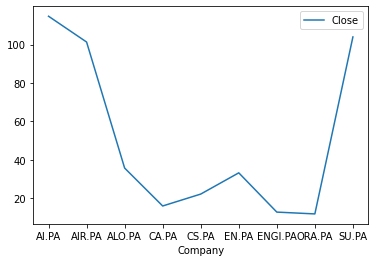

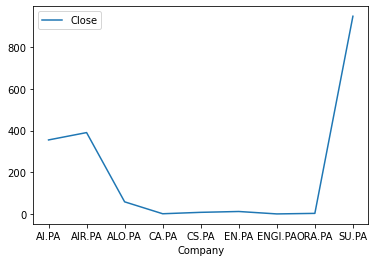

In [199]:
plt.figure(figsize=(18,14))
base.groupby("Company").mean().plot()
base.groupby("Company").var().plot()

<AxesSubplot:>

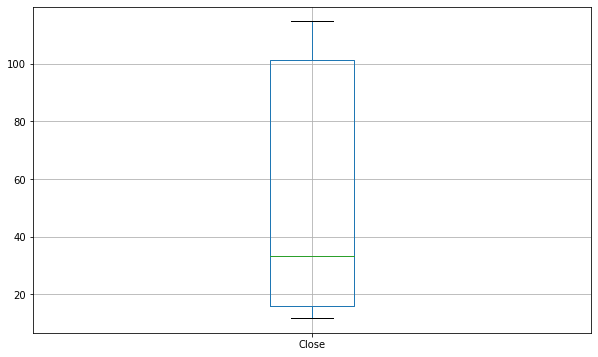

In [200]:
plt.figure(figsize=(10,6))
base.groupby("Company").mean().boxplot()

In [201]:
df=base.groupby("Company")
df.head()

,Close,Company
Date,,
2018-02-01,85.247932,AI.PA
2018-03-01,82.214874,AI.PA
2018-04-01,89.297523,AI.PA
2018-05-01,87.107437,AI.PA
2018-06-01,89.008263,AI.PA
2018-02-01,98.339996,AIR.PA
2018-03-01,93.800003,AIR.PA
2018-04-01,97.400002,AIR.PA
2018-05-01,97.309998,AIR.PA


In [202]:
liste

['AI.PA',
 'AIR.PA',
 'ALO.PA',
 'CA.PA',
 'CS.PA',
 'EN.PA',
 'ENGI.PA',
 'ORA.PA',
 'SU.PA']

On crée des vecteurs contenant la variable d'intérêt de chaque entreprise

In [227]:
a=base[base.Company=='AI.PA']
b=base[base.Company=='AIR.PA']
c=base[base.Company=='ALO.PA']
e=base[base.Company=='CA.PA']
f=base[base.Company=='CS.PA']
g=base[base.Company=='EN.PA']
h=base[base.Company=='ENGI.PA']
i=base[base.Company=='ORA.PA']
j=base[base.Company=='SU.PA']

Visualisation des séries de chacune des entreprises.
Le constat est que le rythme d'évolution diffère d'une entreprise à l'autre. Cependant certains comportements de progression sont similaires.

Company
AI.PA      AxesSubplot(0.125,0.125;0.775x0.755)
AIR.PA     AxesSubplot(0.125,0.125;0.775x0.755)
ALO.PA     AxesSubplot(0.125,0.125;0.775x0.755)
CA.PA      AxesSubplot(0.125,0.125;0.775x0.755)
CS.PA      AxesSubplot(0.125,0.125;0.775x0.755)
EN.PA      AxesSubplot(0.125,0.125;0.775x0.755)
ENGI.PA    AxesSubplot(0.125,0.125;0.775x0.755)
ORA.PA     AxesSubplot(0.125,0.125;0.775x0.755)
SU.PA      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

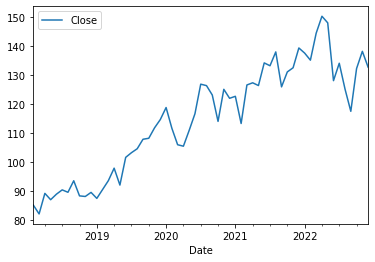

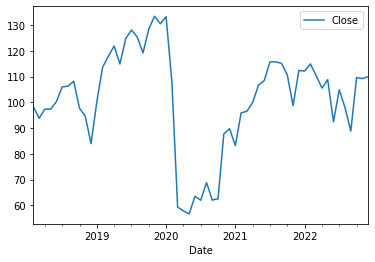

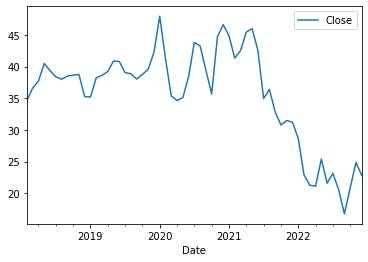

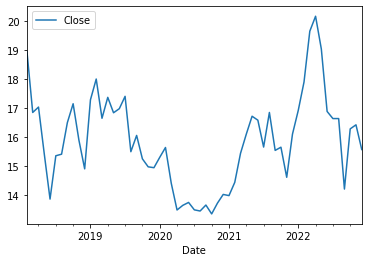

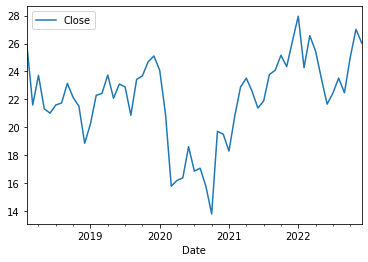

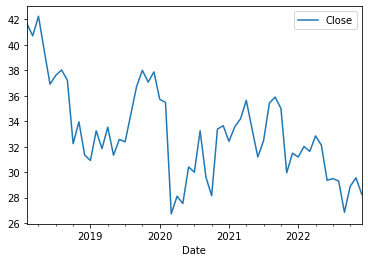

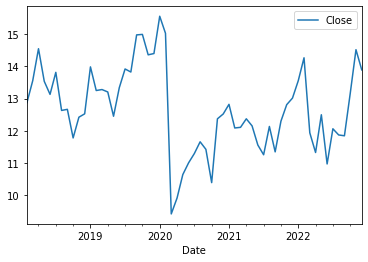

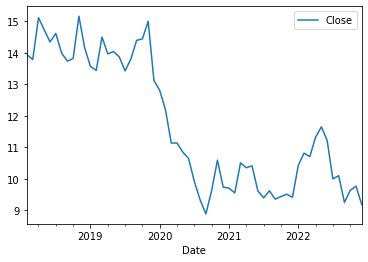

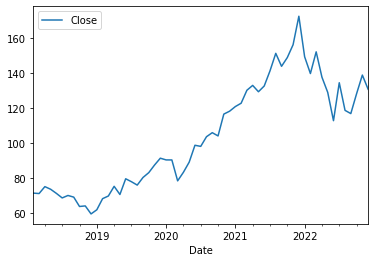

In [204]:
df[['Close','Company']].plot()

La figure ci-dessous donne la représentation sur un même graphique des séries de fermeture du prix de l'action des entreprises.
A partir de ce graphique, on peut dire que ces entreprises peuvent être regroupés en 2 ou 3 clusters selon le prix et l'évolution de l'action.

Text(0.5, 1.0, 'Indice boursier')

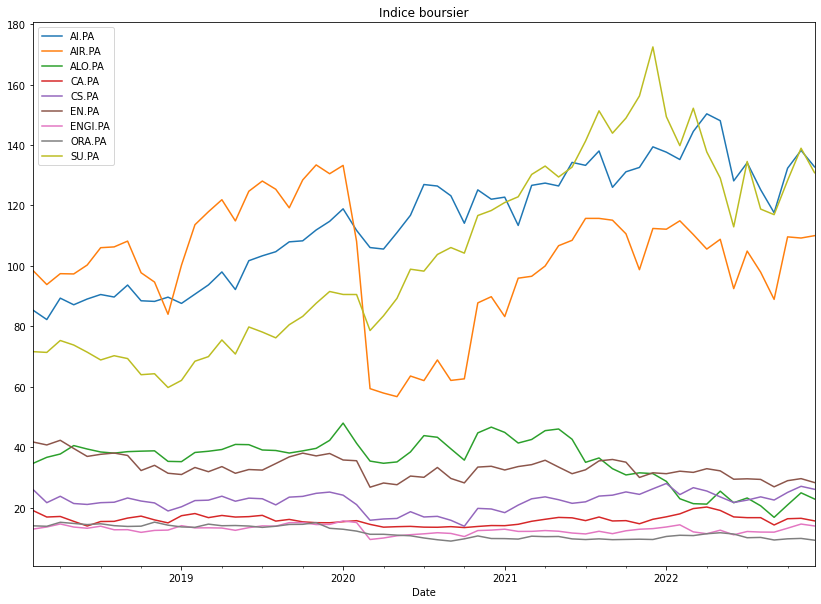

In [205]:
plt.figure(figsize=(14,10))
df['Close'].plot()
plt.legend()
plt.title('Indice boursier')

Parmi ces entreprises on en choisit 4 pour tester l'algorithme de clustering.
Et on choisit à partir du graphique 2 comme nombre de clusters.

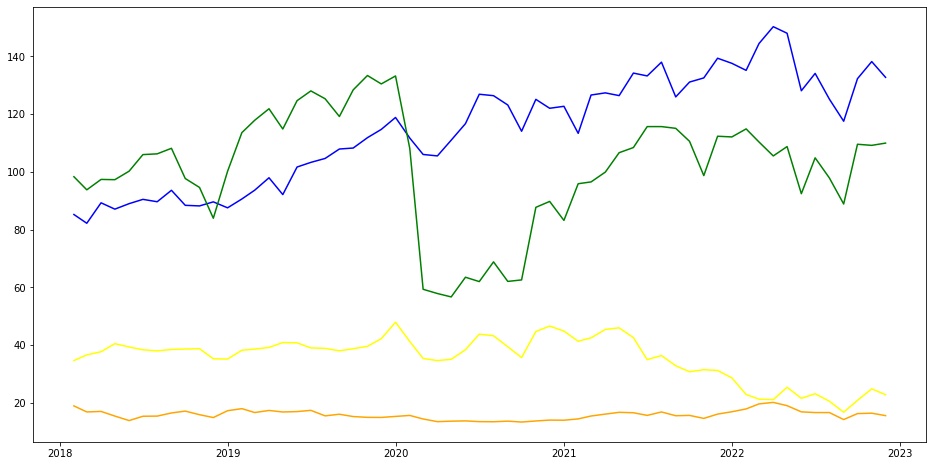

In [206]:
plt.figure(figsize=(16,8))
plt.plot(a['Close'], c='blue')
plt.plot(b['Close'], c='green')
plt.plot(c['Close'], c='yellow')
plt.plot(e['Close'], c='orange')

L'algorithme de clustering comme le montre le graphique a regroupé les deux premières dans un cluster et les deux dernières dans un autre.

In [233]:
model = TimeSeriesKMeans(n_clusters=2, metric="dtw")
predict = model.fit_predict([a['Close'], b['Close'], c['Close'], e['Close']])

rs = pd.Series(np.array(predict), index=['a','b','c','d'])
print(rs)

a    1
b    1
c    0
d    0
dtype: int64


On construit un tableau croisée de l'ensemble des entreprises et de leur série en fonction des dates pour faire le K-means.

In [210]:
test=pd.DataFrame([a['Close'],b['Close'],c['Close'],e['Close'],f['Close'],g['Close'],h['Close'],i['Close'],j['Close']])
test.index=liste
test

Date,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,...,2022-03-01,2022-04-01,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01
AI.PA,85.247932,82.214874,89.297523,87.107437,89.008263,90.495865,89.669418,93.636360,88.429749,88.223137,...,144.472733,150.309097,148.036362,128.119995,134.119995,125.199997,117.559998,132.300003,138.220001,132.759995
AIR.PA,98.339996,93.800003,97.400002,97.309998,100.260002,106.000000,106.260002,108.180000,97.709999,94.620003,...,110.360001,105.540001,108.779999,92.449997,104.879997,97.889999,88.889999,109.580002,109.199997,109.980003
ALO.PA,34.650002,36.610001,37.709999,40.500000,39.360001,38.380001,38.000000,38.490002,38.650002,38.759998,...,21.270000,21.120001,25.400000,21.590000,23.150000,20.559999,16.745001,20.860001,24.860001,22.820000
CA.PA,18.950001,16.850000,17.035000,15.425000,13.870000,15.360000,15.415000,16.500000,17.150000,15.900000,...,19.645000,20.160000,19.030001,16.885000,16.639999,16.639999,14.215000,16.285000,16.424999,15.575000
CS.PA,25.860001,21.600000,23.719999,21.325001,21.014999,21.600000,21.745001,23.150000,22.139999,21.514999,...,26.565001,25.459999,23.510000,21.660000,22.450001,23.525000,22.475000,25.000000,27.020000,26.030001
EN.PA,41.660000,40.709999,42.250000,39.540001,36.910000,37.610001,38.029999,37.230000,32.240002,33.959999,...,31.629999,32.849998,32.130001,29.360001,29.500000,29.299999,26.850000,28.879999,29.559999,28.260000
ENGI.PA,12.875000,13.555000,14.550000,13.535000,13.130000,13.815000,12.630000,12.665000,11.775000,12.420000,...,11.934000,11.322000,12.496000,10.966000,12.060000,11.868000,11.842000,13.154000,14.520000,13.892000
ORA.PA,13.940000,13.785000,15.115000,14.725000,14.345000,14.615000,13.990000,13.735000,13.820000,15.160000,...,10.704000,11.318000,11.648000,11.220000,9.997000,10.098000,9.248000,9.631000,9.768000,9.180000
SU.PA,71.580002,71.339996,75.279999,73.779999,71.419998,68.839996,70.239998,69.300003,63.959999,64.279999,...,152.160004,137.699997,129.039993,112.900002,134.539993,118.779999,116.940002,128.259995,138.919998,130.820007


In [211]:
data=test.transpose()
data

,AI.PA,AIR.PA,ALO.PA,CA.PA,CS.PA,EN.PA,ENGI.PA,ORA.PA,SU.PA
Date,,,,,,,,,
2018-02-01,85.247932,98.339996,34.650002,18.950001,25.860001,41.660000,12.875,13.940,71.580002
2018-03-01,82.214874,93.800003,36.610001,16.850000,21.600000,40.709999,13.555,13.785,71.339996
2018-04-01,89.297523,97.400002,37.709999,17.035000,23.719999,42.250000,14.550,15.115,75.279999
2018-05-01,87.107437,97.309998,40.500000,15.425000,21.325001,39.540001,13.535,14.725,73.779999
2018-06-01,89.008263,100.260002,39.360001,13.870000,21.014999,36.910000,13.130,14.345,71.419998
2018-07-01,90.495865,106.000000,38.380001,15.360000,21.600000,37.610001,13.815,14.615,68.839996
2018-08-01,89.669418,106.260002,38.000000,15.415000,21.745001,38.029999,12.630,13.990,70.239998
2018-09-01,93.636360,108.180000,38.490002,16.500000,23.150000,37.230000,12.665,13.735,69.300003
2018-10-01,88.429749,97.709999,38.650002,17.150000,22.139999,32.240002,11.775,13.820,63.959999


Cet algorithme permet de déterminer le nombre optimal de clusters.
On trouve 2. Cependant la représentation nous permettait de voir que les entreprises pourraient également être regroupées dans 3 clusters.

C:\Users\KADER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


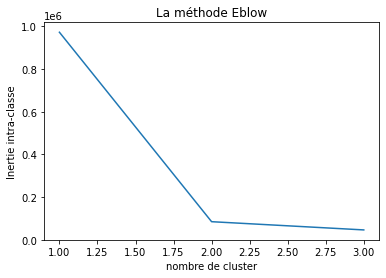

In [232]:
tab=[]
for i in range(1,4):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(test)
    tab.append(kmeans.inertia_)
plt.plot(range(1,4),tab)
plt.title("La méthode Eblow")
plt.xlabel("nombre de cluster")
plt.ylabel("Inertie intra-classe")
plt.show()

On a testé l'algorithme avec deux distances la distances euclidienne et la distance DTW qui permet de calculer la distances entre des dates différentes pour les séries temporelles.

In [240]:
modele1 = TimeSeriesKMeans(n_clusters=2, metric="euclidean")
predict_euc = modele1.fit_predict(test)


rs_euc = pd.Series(np.array(predict_euc), index=liste)
print(rs_euc)

AI.PA      1
AIR.PA     1
ALO.PA     0
CA.PA      0
CS.PA      0
EN.PA      0
ENGI.PA    0
ORA.PA     0
SU.PA      1
dtype: int64


In [239]:
modele2 = TimeSeriesKMeans(n_clusters=2, metric="dtw")
predict_dtw = modele2.fit_predict(test)

rs_dtw = pd.Series(np.array(predict_dtw), index=liste)
print(rs_dtw)

AI.PA      1
AIR.PA     1
ALO.PA     0
CA.PA      0
CS.PA      0
EN.PA      0
ENGI.PA    0
ORA.PA     0
SU.PA      1
dtype: int64


En prenant le nombre optimal 2 donné par la méthode d'Ablow, le K-means avec les deux métriques donnent le même résultat.

In [241]:
modele11 = TimeSeriesKMeans(n_clusters=3, metric="euclidean")
predict_euc1 = modele11.fit_predict(test)


rs_euc1 = pd.Series(np.array(predict_euc1), index=liste)
print(rs_euc1)

AI.PA      2
AIR.PA     0
ALO.PA     1
CA.PA      1
CS.PA      1
EN.PA      1
ENGI.PA    1
ORA.PA     1
SU.PA      2
dtype: int64


In [243]:
modele22 = TimeSeriesKMeans(n_clusters=3, metric="dtw")
predict_dtw2 = modele22.fit_predict(test)

rs_dtw2 = pd.Series(np.array(predict_dtw2), index=liste)
print(rs_dtw2)

AI.PA      1
AIR.PA     1
ALO.PA     0
CA.PA      2
CS.PA      2
EN.PA      0
ENGI.PA    2
ORA.PA     2
SU.PA      1
dtype: int64


En revanche, lorsque l'on fixe le nombre de clusters à 3, on constate que les résultats diffèrent et celui avec la métrique DTW est plus proche de l'intuition tirée à partir de la visualisation du graphique.

En définitive, ce projet constitue notre premier en machine learning avec Python. Il a été une occasion de mettre en oeuvre les différents outils appris en classe et nous a permis de voir le rôle que peut jouer le machine dans l'exploitation des données financières.